# Pymaceuticals Inc.
---

### Analysis

Squamous cell carcinoma (SCC) is a prevalent type of skin cancer found in mice, requiring effective treatment strategies. A study was conducted over a 49-day period, involving 249 mice, to evaluate various drug regimens for SCC treatment.

#### Objective:

The primary objective of the study was to assess the efficacy of different drug regimens in inhibiting tumor growth in mice with SCC. Specifically, the study aimed to compare the effectiveness of Capomulin with other drug regimens.

#### Study Design:

Duration: The study spanned 49 days.
Participants: A total of 249 mice were included in the study.

#### Observation: 

Tumor development was closely observed and measured throughout the study period.
Multiple drug regimens were administered to the mice, with a focus on comparing the efficacy of Capomulin and surprisingly, Ramicane against other drugs.

#### Key Findings:

Top Performing Drugs: The analysis revealed that Capomulin and Ramicane were the most effective drug regimens in inhibiting tumor growth compared to other treatments. In fact, Ramicane outperformed Capomulin in the final tumor volume of the study, having a slightly lower tumor volume than Capomulin. 

Gender Distribution: The study cohort comprised 51% male and 49% female mice.

Correlation Analysis: A significant correlation (.84) was observed between mouse weight and tumor volume, indicating that heavier mice tended to have larger tumor volumes.

#### Conclusion:

The study highlights the efficacy of Capomulin and Ramicane as promising treatments for SCC in mice. Additionally, the correlation between mouse weight and tumor volume underscores the importance of considering weight-related factors in SCC treatment studies.

#### Recommendations:

Further research and clinical trials may be warranted to validate the findings of this study and explore potential combination therapies or alternative treatment approaches for SCC in mice. Additionally, investigating the underlying mechanisms driving the observed correlation between mouse weight and tumor volume could provide valuable insights for future studies.
 

In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, how = "left", on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [74]:
# Checking the number of mice.
mice_count = len(combined_data["Mouse ID"].unique())
mice_count

249

In [75]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]["Mouse ID"].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [76]:
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep = False)]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [77]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mice_id)]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [78]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe = combined_data[~combined_data["Mouse ID"].isin(duplicate_mice_id)]
clean_dataframe

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [79]:
# Checking the number of mice in the clean DataFrame.
mice_count_new_df = len(clean_dataframe["Mouse ID"].unique())
mice_count_new_df

248

## Summary Statistics

In [80]:
 #Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the 
#tumor volume for each regimen

summary_statistics_mean = clean_dataframe.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
summary_statistics_median = clean_dataframe.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
summary_statistics_var = clean_dataframe.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
summary_statistics_std = clean_dataframe.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
summary_statistics_sem = clean_dataframe.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame({
    "Mean Tumor Volume": summary_statistics_mean,
    "Median Tumor Volume": summary_statistics_median,
    "Tumor Volume Variance": summary_statistics_var,
    "Tumor Volume Std. Dev.": summary_statistics_std,
    "Tumor Volume Std. Err.": summary_statistics_sem})
summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [81]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics2= clean_dataframe.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
summary_statistics2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

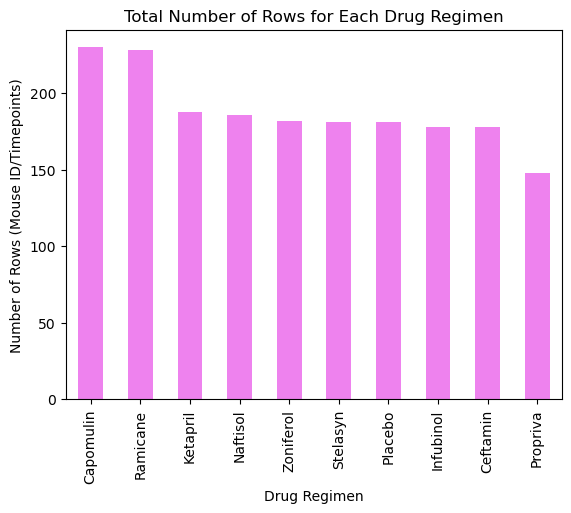

In [82]:
# Generate a bar plot showing the total number of rows 
#(Mouse ID/Timepoints) for each drug regimen using Pandas.

rows_per_drug_regimen =clean_dataframe["Drug Regimen"].value_counts()

rows_per_drug_regimen.plot(kind="bar", color = "violet", align = "center")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows (Mouse ID/Timepoints)")
plt.title("Total Number of Rows for Each Drug Regimen")
plt.show()

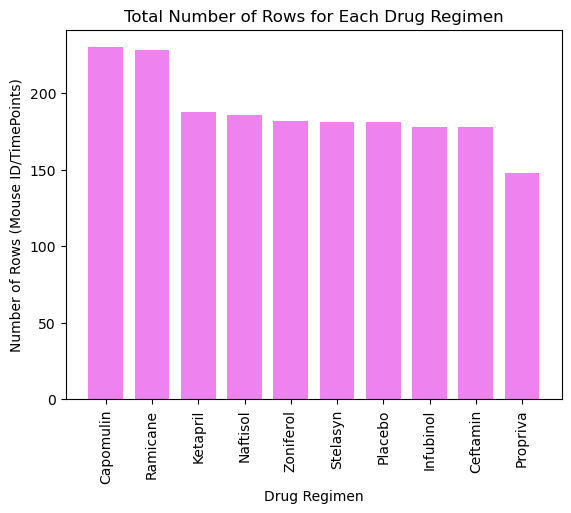

In [83]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = rows_per_drug_regimen.index
y_axis = rows_per_drug_regimen.values
plt.bar(x_axis,y_axis, color="violet", width=.75, align= "center")
plt.title("Total Number of Rows for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows (Mouse ID/TimePoints)")
plt.xticks(rotation=90)

plt.show()

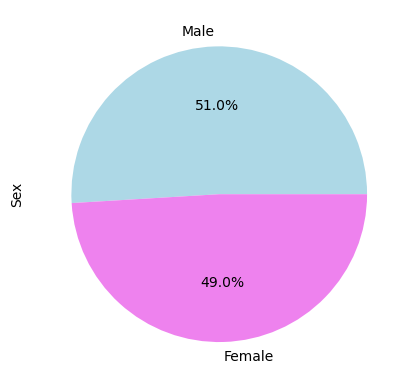

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution=clean_dataframe["Sex"].value_counts()
colors = ["lightblue", "violet"]
sex_distribution.plot(kind="pie", colors= colors, autopct='%1.1f%%')
plt.show()

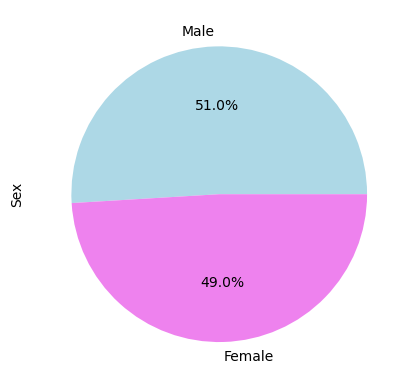

In [85]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_distribution= clean_dataframe["Sex"].value_counts()
labels = ["Male", "Female"]
colors = ["lightblue", "violet"]
plt.pie(sex_distribution, labels=labels, colors=colors, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [86]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint =clean_dataframe.groupby("Mouse ID")["Timepoint"].max()
greatest_timepoint_dataframe = pd.DataFrame(greatest_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_dataframe = pd.merge(greatest_timepoint_dataframe, clean_dataframe, on=["Mouse ID", "Timepoint"])
final_tumor_volume_dataframe

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [87]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    treatment_df = final_tumor_volume_dataframe.loc[final_tumor_volume_dataframe["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    # Locate the rows which contain mice on each drug and get the tumor volumes
  
    # add subset 
    tumor_vol_data.append(treatment_df)
    
    # Determine outliers using upper and lower bounds
    quartiles = treatment_df.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr=upperq-lowerq
                                     
    lower_bound = lowerq -1.5 * iqr
    upper_bound = upperq +1.5 * iqr
                                     
    outliers = treatment_df[(treatment_df <lower_bound)| (treatment_df > upper_bound)]
    print (f"{treatment}'s potential outliers:'{outliers}")

Capomulin's potential outliers:'Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:'Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:'31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:'Series([], Name: Tumor Volume (mm3), dtype: float64)


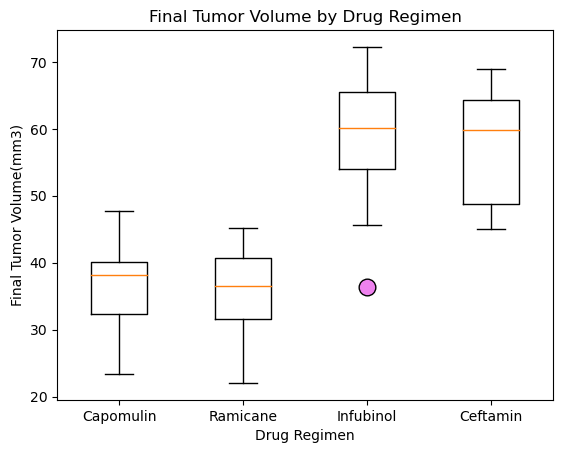

In [88]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(markerfacecolor='violet', markersize=12))
plt.ylabel("Final Tumor Volume(mm3)")
plt.xlabel("Drug Regimen")
plt.title("Final Tumor Volume by Drug Regimen")
plt.show()

## Line and Scatter Plots

In [89]:
# Find mouse l509 data
mouse_l509_data = clean_dataframe[clean_dataframe["Mouse ID"] == "l509"]
mouse_l509_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


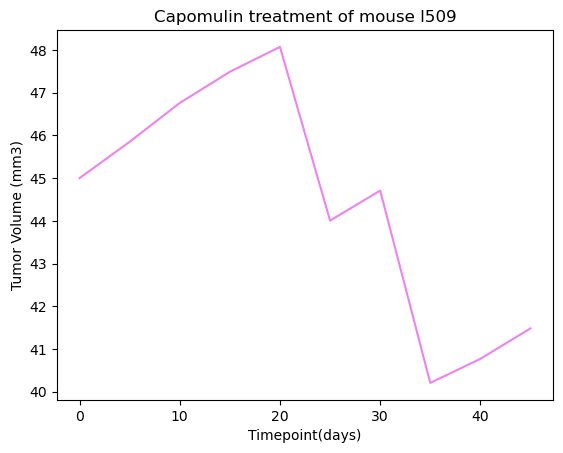

In [90]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509_data = clean_dataframe[clean_dataframe["Mouse ID"] == "l509"]
x_axis=mouse_l509_data["Timepoint"]
y_axis=mouse_l509_data["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis, color="violet")
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [91]:
capomulin_regimen=clean_dataframe[clean_dataframe["Drug Regimen"]== "Capomulin"]
capomulin_regimen

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [92]:
capomulin_average = capomulin_regimen.groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"})
capomulin_average

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236
j246,21.0,43.216925


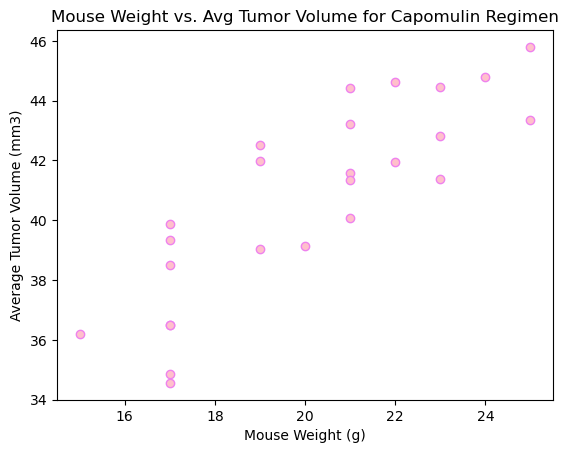

In [93]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"], marker='o', facecolors='pink', edgecolors='violet')

plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Avg Tumor Volume for Capomulin Regimen")

plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


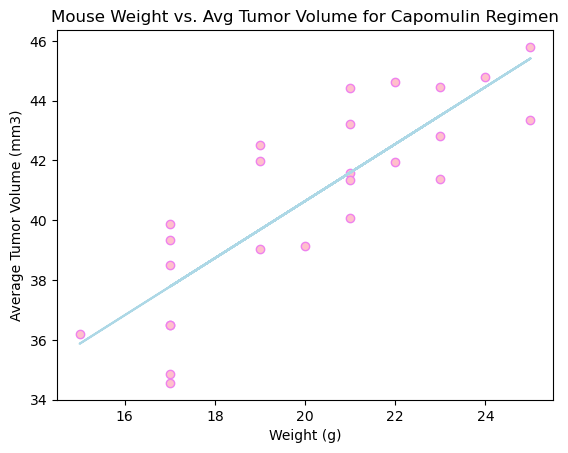

In [102]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


(slope, intercept, r_value, p_value, std_err) = linregress(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])


plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"], marker='o', facecolors='pink', edgecolors='violet')

plt.plot(capomulin_average["Weight (g)"],slope * capomulin_average["Weight (g)"] + intercept, color='lightblue')


print(f"The correlation between mouse weight and the average tumor volume is: {r_value:.2f}")

# Labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Avg Tumor Volume for Capomulin Regimen")

plt.show()